<a href="https://colab.research.google.com/github/HarshESC/TalkData-Mobile-Demographics/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import normaltest



from sklearn.cluster import (
    KMeans,
    DBSCAN,
    AffinityPropagation,
    MeanShift,
)
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter, defaultdict
from sklearn import metrics

import time


import warnings
warnings.filterwarnings('ignore')
from google.colab import drive 
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/"
%cd "/content/gdrive/My Drive/Final Capstone"


Mounted at /content/gdrive
/content/gdrive/My Drive/Final Capstone


In [ ]:
# Applying random sample to increase run time speed
master_df = pd.read_csv("master_clean_2.csv")
master_df = master_df.sample(10000, random_state=13)
master_df.head()


,event_id,app_id,is_active,device_id,label_id_x,download_id,251,252,405,548,549,704,713,730,756,757,761,775,777,779,782,783,787,959,960,1007,english_phone_brand_coolpad,english_phone_brand_huawei,english_phone_brand_lshi,english_phone_brand_meizu,english_phone_brand_oppo,english_phone_brand_samsung,english_phone_brand_xiaomi,device_model_Galaxy Note 3,device_model_MI 4,device_model_MX4,device_model_MX5,device_model_Mate 7,device_model_R7s,device_model_U3,device_model_note顶配版,device_model_小米note,device_model_荣耀6,device_model_荣耀6 Plus,device_model_超级手机1 Pro,device_model_魅蓝metal,device_model_麦芒4,num_group
8331,700034,33792862810792679,0,-7804296101691453441,704,-7770503238880660762,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,11
21694,1966401,2689721421138748406,0,-2329109837902397383,704,360611583236351023,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
35362,3176021,6965654211116534216,0,-6887525481849727578,777,78128729266806638,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
19375,1669382,6290062395240548114,0,5499466531572133131,548,-6657215146896870371,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5
931,75974,3722410295315095646,0,-6335083146238767307,704,-2612672850923671661,0,0,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3


In [ ]:
# Create copy of data frame and rename to be used for clustering
master_cluster_df = master_df.copy()


In [ ]:
# drop columns that won't be necessary for clustering data
master_cluster_df = master_cluster_df.drop(columns=["app_id", "device_id", "event_id"])


# Clustering

For clustering I will be using 2 dimensionality reduction methods (PCA & t-sne) and 2 clustering algorithms (KMeans and Gaussian Mixture Models)

First I will apply PCA to the 2 different methods. Since I am applying PCA it is important to scale and standardize the data.



# Applying PCA to Data

In [ ]:
# need to standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(master_cluster_df)


In [ ]:
# Computing the principal components
pca = PCA()
X_pca = pca.fit_transform(X_std)


In [ ]:
# I plan to use the amount of components that add up to 60% variance.
n_components = np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.60)
X_pca = X_pca[:, :n_components]


In [ ]:
# check to see the amount of components being used
n_components


9

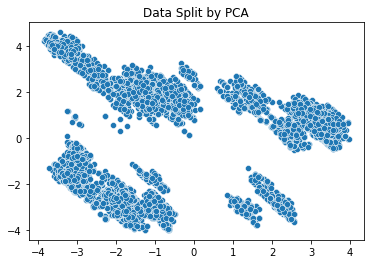

In [ ]:
# adding a scatterplot to visualize how the data was split using PCA
# just eyeballing the plot there does not appear to be any noticeable clusters.
sns.scatterplot(X_pca[:, 0], X_pca[:, 1])
plt.title("Data Split by PCA")
plt.show()


# Applying KMeans to the Data

To keep cluster results consistant I am applying a random state of 13 so when I close the notebook and come back to it at later times my results will remain the same. I am choosing to create 3-10 clusters and compare those results.



In [ ]:
for c in range(1, 11):
    km = KMeans(n_clusters=c, random_state=13)
    km.fit(X_pca)
    labels = km.fit_predict(X_pca)
    print(
        f"The Silhouette Score for {c} clusters: "
        + str(metrics.silhouette_score(X_pca, labels, metric="euclidean"))
    )


The Silhouette Score for 3 clusters: 0.24381087306168034
The Silhouette Score for 4 clusters: 0.25853146880752903
The Silhouette Score for 5 clusters: 0.27710446542220074
The Silhouette Score for 6 clusters: 0.28901939590303366
The Silhouette Score for 7 clusters: 0.3095657523337563
The Silhouette Score for 8 clusters: 0.2892153301527631
The Silhouette Score for 9 clusters: 0.29837541661362343
The Silhouette Score for 10 clusters: 0.29286775730522635


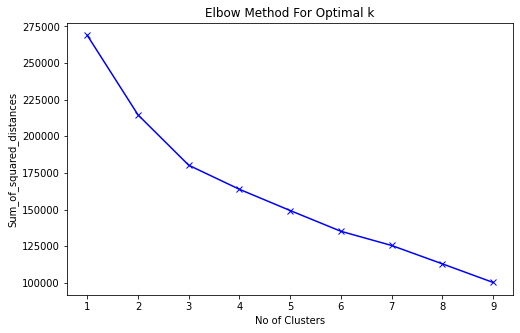

In [ ]:
plt.figure(figsize=(8,5))

K = range(1,10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_pca)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No of Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


Seems that as we increase the clusters, the silhouette score increased.   I'll plot the two most interesting ones, in terms of drastic increases (5 clusters, 11 clusters, and 14 clusters)

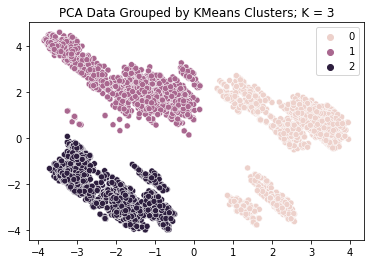

In [ ]:
# Interesting to visualize how KMeans clusters the PCA data. (Using n_clusters = 10 since
# that resulted in highest Silhouette Score)
km = KMeans(n_clusters=3, random_state=13)
km.fit(X_pca)
labels = km.fit_predict(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=labels)
plt.title("PCA Data Grouped by KMeans Clusters; K = 3")
plt.show()


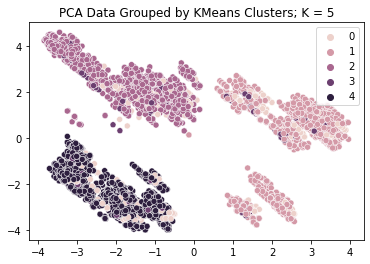

In [ ]:
# Interesting to visualize how KMeans clusters the PCA data. (Using n_clusters = 10 since
# that resulted in highest Silhouette Score)
km = KMeans(n_clusters=5, random_state=13)
km.fit(X_pca)
labels = km.fit_predict(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=labels)
plt.title("PCA Data Grouped by KMeans Clusters; K = 5")
plt.show()

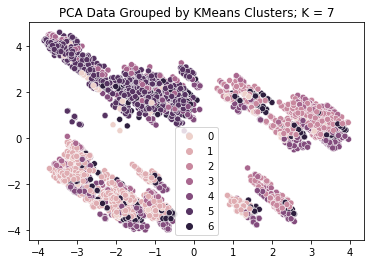

In [ ]:
# Interesting to visualize how KMeans clusters the PCA data. (Using n_clusters = 10 since
# that resulted in highest Silhouette Score)
km = KMeans(n_clusters=7, random_state=13)
km.fit(X_pca)
labels = km.fit_predict(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=labels)
plt.title("PCA Data Grouped by KMeans Clusters; K = 7")
plt.show()

# Let's Apply T-SNE to our Data

In [ ]:
tsne_results = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=250)
X_tsne = tsne_results.fit_transform(X_std)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 2.387s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.462538
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.884693
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170435

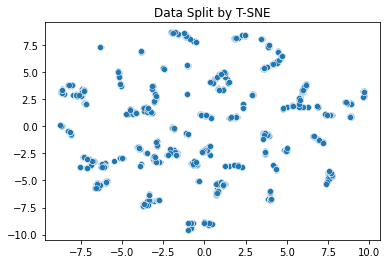

In [ ]:
# adding a scatterplot to visualize how the data was split using PCA
# just eyeballing the plot there does not appear to be any noticeable clusters.
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1])
plt.title("Data Split by T-SNE")
plt.show()


In [ ]:
X_tsne

array([[ 2.2995825 , -3.7428567 ],
       [ 1.1283318 , -5.3342156 ],
       [-0.97971135, -9.5448675 ],
       ...,
       [ 0.89447945,  3.3859916 ],
       [-1.0530432 ,  2.9808314 ],
       [-2.9741068 ,  2.8249047 ]], dtype=float32)

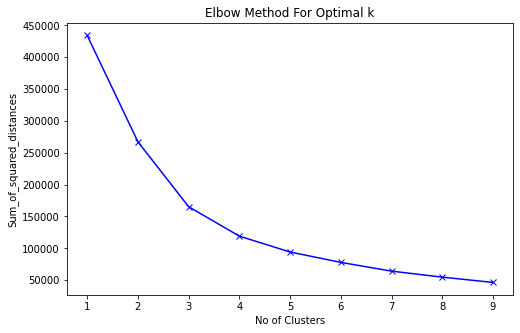

In [ ]:
plt.figure(figsize=(8,5))

K = range(1,10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_tsne)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No of Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
for c in range(2, 9):
    gmm = GaussianMixture(n_components=c, random_state=42, max_iter=5000)
    cluster = gmm.fit(X_tsne)
    labels = gmm.fit_predict(X_tsne)
    print(
        f"The Silhouette Score for {c} clusters: "
        + str(metrics.silhouette_score(X_tsne, labels, metric="euclidean"))
    )


The Silhouette Score for 2 clusters: 0.3615061
The Silhouette Score for 3 clusters: 0.39623436
The Silhouette Score for 4 clusters: 0.39857134
The Silhouette Score for 5 clusters: 0.34839723
The Silhouette Score for 6 clusters: 0.35294068
The Silhouette Score for 7 clusters: 0.32651418
The Silhouette Score for 8 clusters: 0.33848223


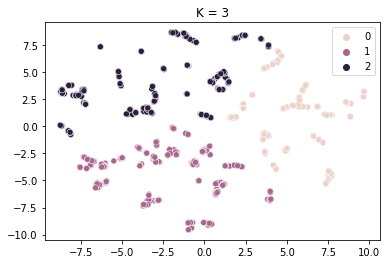

In [ ]:
# Plot the solution.
gmm = GaussianMixture(n_components=3, random_state=42, max_iter=5000)
cluster = gmm.fit(X_tsne)
labels = gmm.fit_predict(X_tsne)

sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue = labels)
plt.title("K = 3")
plt.legend()
plt.show()


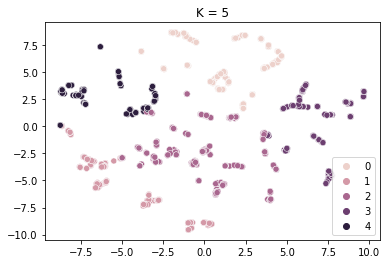

In [ ]:
# Plot the solution.
gmm = GaussianMixture(n_components=5, random_state=42, max_iter=5000)
cluster = gmm.fit(X_tsne)
labels = gmm.fit_predict(X_tsne)

sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue = labels)
plt.title("K = 5")
plt.legend()
plt.show()


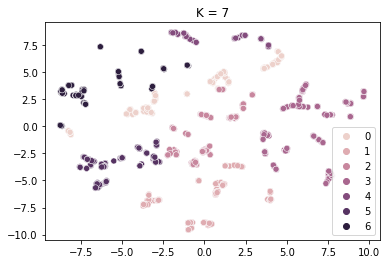

In [ ]:
# Plot the solution.
gmm = GaussianMixture(n_components=7, random_state=42, max_iter=5000)
cluster = gmm.fit(X_tsne)
labels = gmm.fit_predict(X_tsne)

sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue = labels)
plt.title("K = 7")
plt.legend()
plt.show()


In [ ]:
# adding the cluster labels to the original dataframe
master_df["Cluster"] = km.labels_


In [ ]:
master_df.head()


,event_id,app_id,is_active,device_id,label_id_x,download_id,251,252,405,548,549,704,713,730,756,757,761,775,777,779,782,783,787,959,960,1007,english_phone_brand_coolpad,english_phone_brand_huawei,english_phone_brand_lshi,english_phone_brand_meizu,english_phone_brand_oppo,english_phone_brand_samsung,english_phone_brand_xiaomi,device_model_Galaxy Note 3,device_model_MI 4,device_model_MX4,device_model_MX5,device_model_Mate 7,device_model_R7s,device_model_U3,device_model_note顶配版,device_model_小米note,device_model_荣耀6,device_model_荣耀6 Plus,device_model_超级手机1 Pro,device_model_魅蓝metal,device_model_麦芒4,num_group,Cluster
8331,700034,33792862810792679,0,-7804296101691453441,704,-7770503238880660762,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,11,0
21694,1966401,2689721421138748406,0,-2329109837902397383,704,360611583236351023,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,3
35362,3176021,6965654211116534216,0,-6887525481849727578,777,78128729266806638,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,3
19375,1669382,6290062395240548114,0,5499466531572133131,548,-6657215146896870371,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5
931,75974,3722410295315095646,0,-6335083146238767307,704,-2612672850923671661,0,0,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0


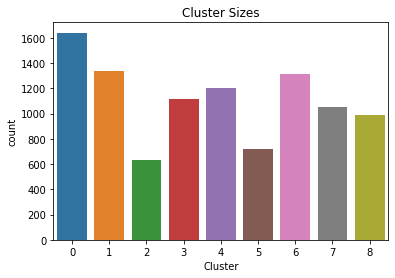

In [ ]:
# Create bar chart for cluster sizes
sns.countplot(master_df["Cluster"])
plt.title("Cluster Sizes")
plt.legend
plt.show()


It appears that majority of the clusters are all around the same size, with cluster 4 and 6 being an exceptions.



In [ ]:
master_df["Cluster"].value_counts()


0    1640
1    1334
6    1313
4    1201
3    1117
7    1054
8     988
5     718
2     635
Name: Cluster, dtype: int64

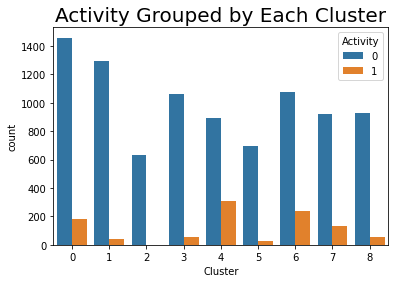

In [ ]:
sns.countplot(data=master_df, x="Cluster", hue="is_active")
plt.legend(
    loc="upper right", title="Activity",
)
sns.set(rc={"figure.figsize": (20, 20)})
sns.set_style("whitegrid")
plt.title("Activity Grouped by Each Cluster", fontsize=20)
plt.show()


No noticeable pattern for activity within each cluster



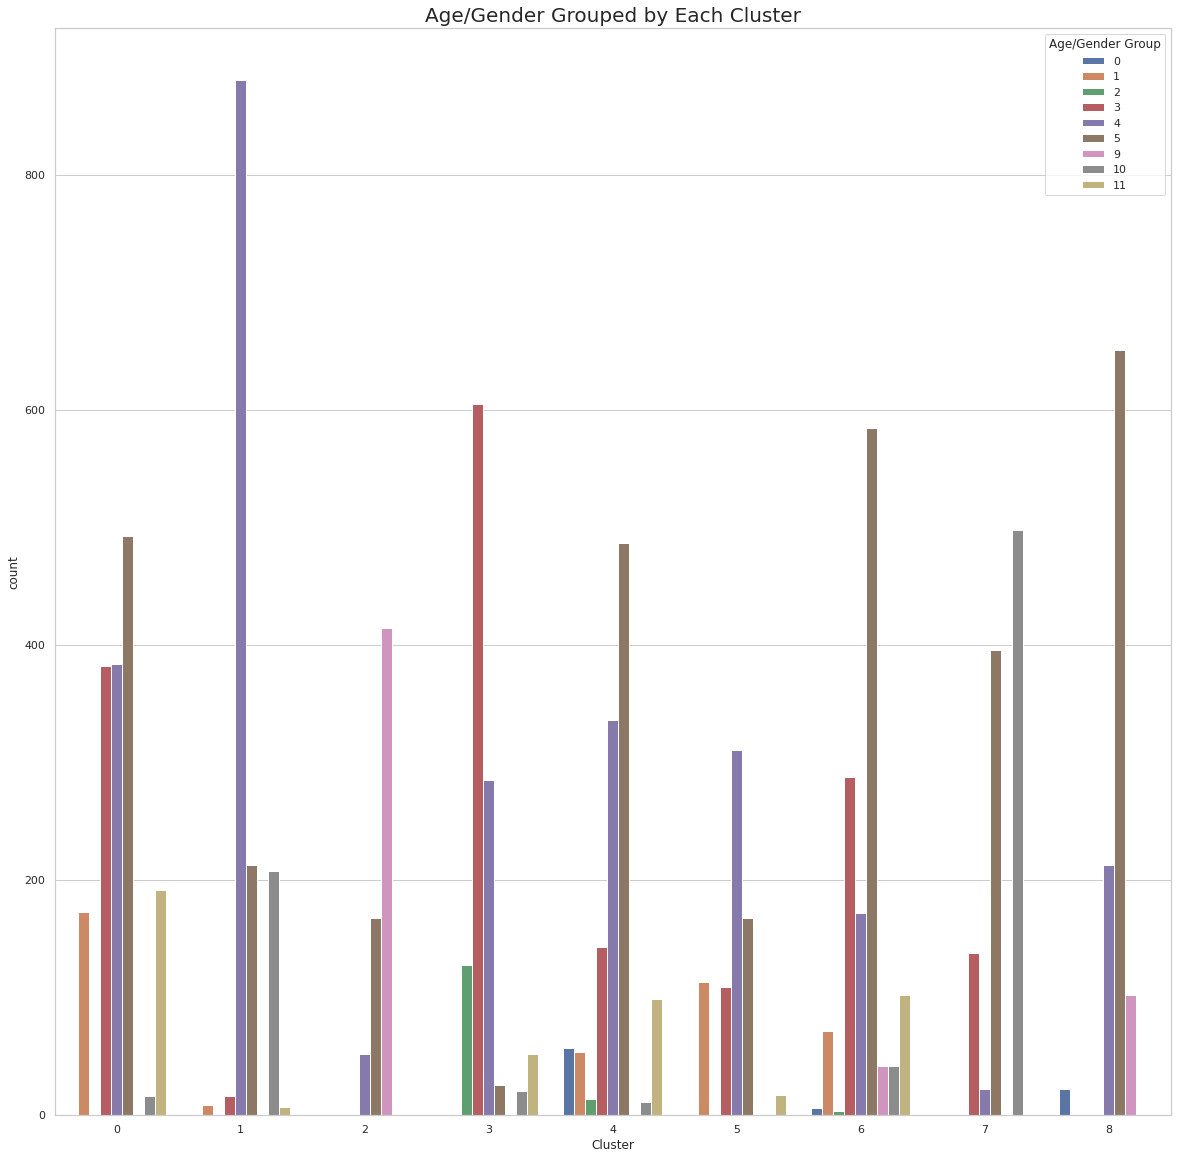

In [ ]:
sns.countplot(data=master_df, x="Cluster", hue="num_group")
plt.legend(
    loc="upper right", title="Age/Gender Group",
)
sns.set(rc={"figure.figsize": (15, 15)})
sns.set_style("whitegrid")
plt.title("Age/Gender Grouped by Each Cluster", fontsize=20)
plt.show()


# Silhouette Score Comparison

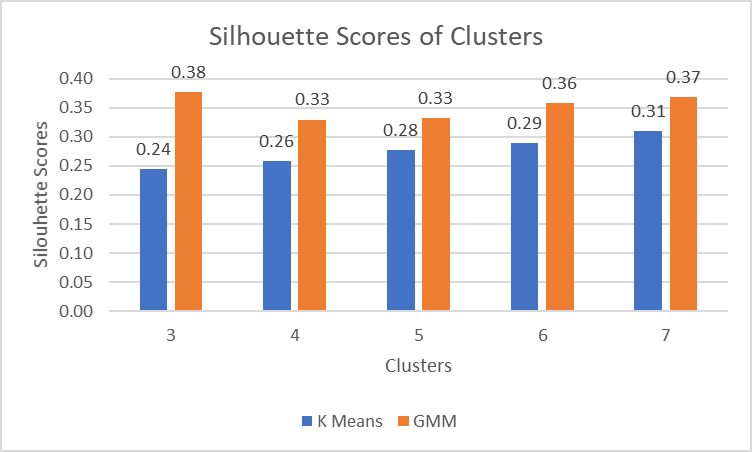

# Let's Compare Silhouette Scores

# Analysis 

The Unsupervised Learning portion of this project consisted of two clustering algorithms and two dimensionality reduction methods. I used K-Means and Gaussian Mixture Modeling along with PCA and T-SNE to try and group up the unlabeled data. 

Much like the supervised learning portion of the project, I had to fit these models to a smaller subsample of the data and therefore the Silhouette Scores were affected in the process. 

I tested many clusters ranging from 3 to 10 for both Reduction techniques and cluster algorithms.  I compared PCA Reduction with K-Means Cluster and T-SNE Reduction with GMM Clustering.  I compared them using silhouette scores.

The best Silhouette Score was obtained from using T-SNE with clusters = 3 and 4 with 0.37 and 0.36.  Overall, the scores were fairly even from 3-9, and then dropped dramatically at 10 clusters with a score of 0.25.  With K-Means and PCA reduction, the scores increased as the number of clusters rose, with the highest being 0.21 silohouette score at 10 clusters.

Each cluster appeared to be relatively the same size with cluster 4⏰ being an exception. It was difficult to find certain patterns within each cluster, but I believe had I performed the clustering on the entire data set, more patterns would be evident.

